In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train(Pr3).csv', sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test(Pr3).csv', sep=',')

In [3]:
fashion_train_df.shape

(60000, 785)

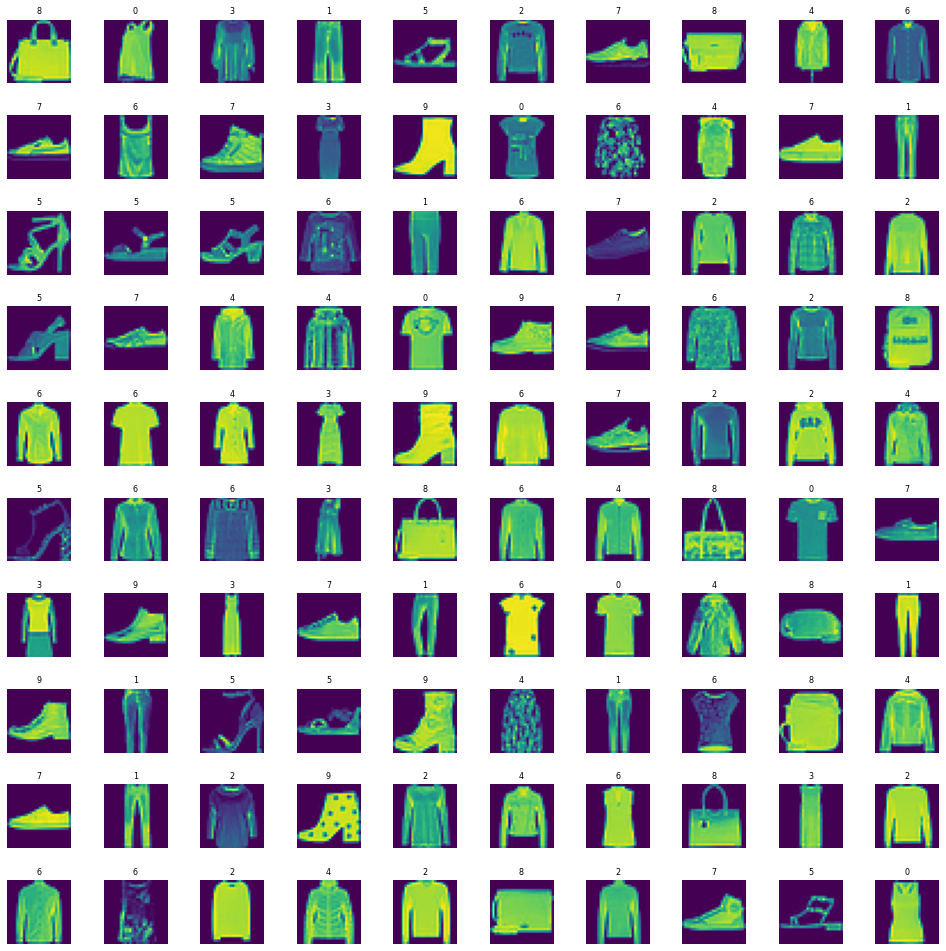

In [4]:
training = np.asarray(fashion_train_df, dtype='float32')

# Lets show multiple images in a 15x15 grid
height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  # this flattens the 15x15 matrix into 225
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [5]:
training = np.asarray(fashion_train_df, dtype='float32')
X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255   # Normalizing the data
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255    # Normalizing the data
y_test = testing[:, 0]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345) 

In [7]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(48000,) (12000,) (10000,)


In [8]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(rate=0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [9]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


_________________________________________________________________


In [10]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=2, validation_data=(X_val, y_val))

Epoch 1/2
94/94 [==============================] - 60s 514ms/step - loss: 0.7124 - accuracy: 0.7604 - val_loss: 0.4649 - val_accuracy: 0.8412
Epoch 2/2
94/94 [==============================] - 45s 474ms/step - loss: 0.4203 - accuracy: 0.8538 - val_loss: 0.3893 - val_accuracy: 0.8647


In [11]:
eval_result = cnn_model.evaluate(X_test, y_test)
print("Accuracy : {:.3f}".format(eval_result[1]))

313/313 [==============================] - 4s 11ms/step - loss: 0.3855 - accuracy: 0.8696
Accuracy : 0.870


In [12]:
y_pred = np.argmax(cnn_model.predict(x=X_test), axis=-1)

313/313 [==============================] - 4s 12ms/step


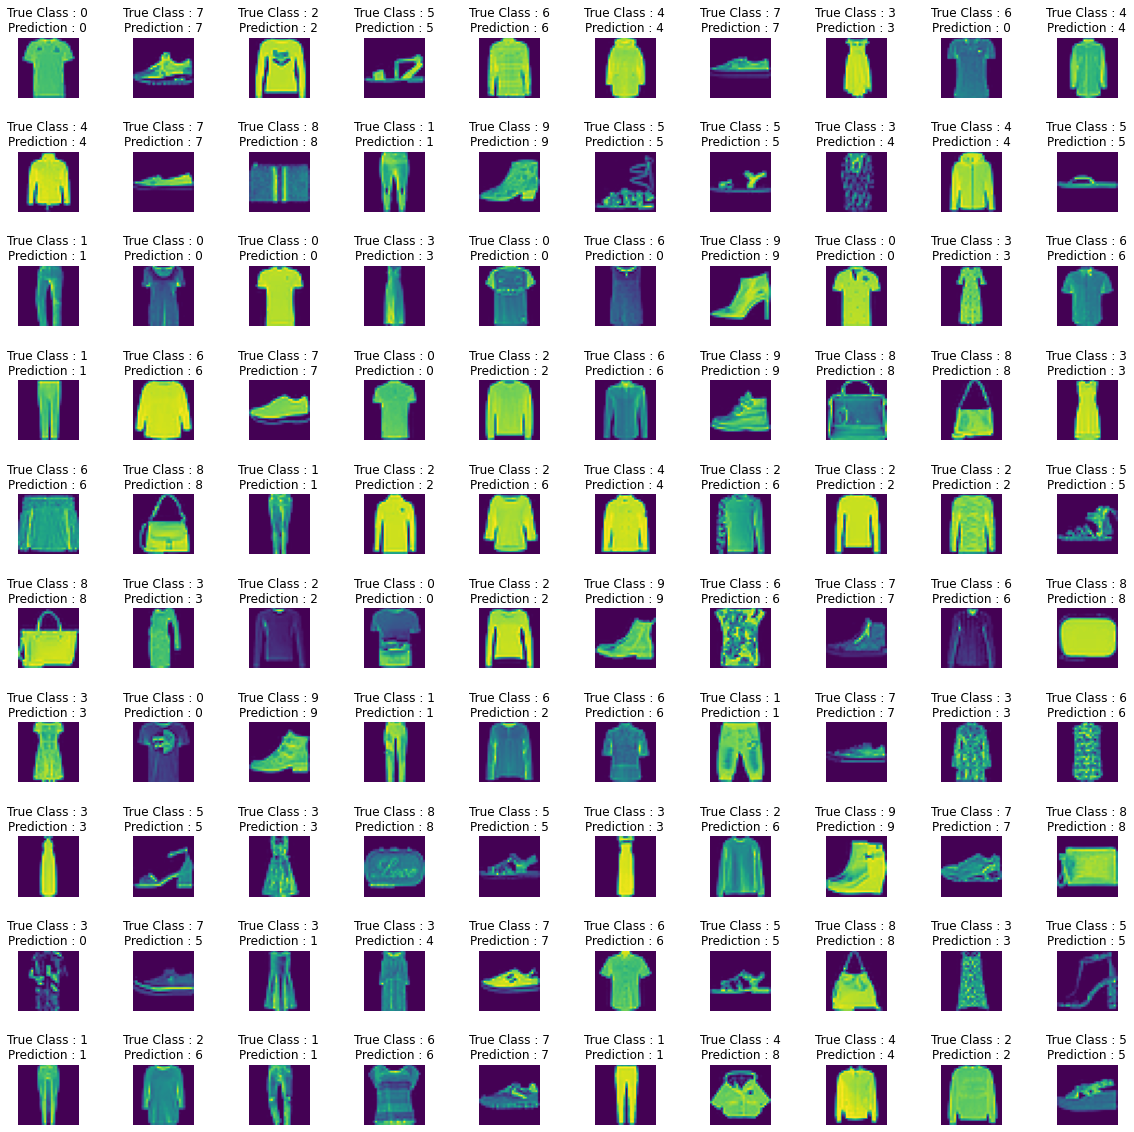

In [13]:
height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(20,20))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(y_pred))
    axes[i].imshow(X_test[index].reshape((28,28)))
    axes[i].set_title("True Class : {:0.0f}\nPrediction : {:d}".format(y_test[index],y_pred[index]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9, wspace=0.5)

<AxesSubplot:>

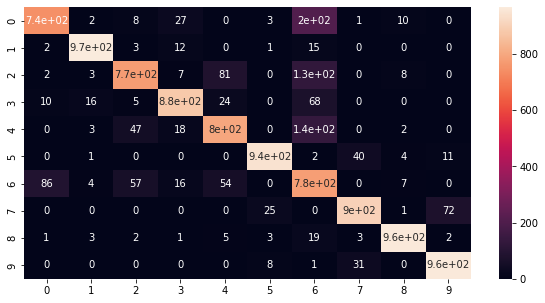

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sbn.heatmap(cm, annot=True)

In [15]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.88      0.74      0.81      1000
     class 1       0.97      0.97      0.97      1000
     class 2       0.86      0.77      0.81      1000
     class 3       0.92      0.88      0.90      1000
     class 4       0.83      0.80      0.81      1000
     class 5       0.96      0.94      0.95      1000
     class 6       0.58      0.78      0.66      1000
     class 7       0.92      0.90      0.91      1000
     class 8       0.97      0.96      0.96      1000
     class 9       0.92      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

